In [194]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
import cftime

In [195]:
fn=['mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-2-0_gr1-GMNHSH_0000-2014.nc',
    'mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_ScenarioMIP_UoM-IMAGE-ssp126-1-2-1_gr1-GMNHSH_2015-2500.nc',
    'mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_ScenarioMIP_UoM-MESSAGE-GLOBIOM-ssp245-1-2-1_gr1-GMNHSH_2015-2500.nc',
    'mole-fraction-of-carbon-dioxide-in-air_input4MIPs_GHGConcentrations_ScenarioMIP_UoM-REMIND-MAGPIE-ssp585-1-2-1_gr1-GMNHSH_2015-2500.nc']

In [203]:
ds=nc.Dataset(fn[0])
co2hist=ds['mole_fraction_of_carbon_dioxide_in_air'][:][:,0]
timehist=ds['time'][:]/365.25
ind=timehist>=1850
timehist=timehist[ind]
co2hist=co2hist[ind]

In [208]:
ds=nc.Dataset(fn[1])
co2ssp126=ds['mole_fraction_of_carbon_dioxide_in_air'][:][:,0]
timessp126=ds['time'][:]/365+1850
ind=timessp126<2250

In [209]:
ds=nc.Dataset(fn[2])
co2ssp245=ds['mole_fraction_of_carbon_dioxide_in_air'][:][:,0]
timessp245=ds['time'][:]/365+1850

In [210]:
ds=nc.Dataset(fn[3])
co2ssp585=ds['mole_fraction_of_carbon_dioxide_in_air'][:][:,0]
timessp585=ds['time'][:]/365+1850

In [234]:
N0=np.size(timehist)
N1=np.size(timessp126)
N2=np.size(timessp245)
N3=np.size(timessp585)
# time
time=np.arange('1850-01','2250-12',dtype='datetime64[Y]')
# pco2
pco2=np.empty((3,400))
pco2[0,:]=np.concatenate((co2hist,co2ssp126[ind]))
pco2[1,:]=np.concatenate((co2hist,co2ssp245[ind]))
pco2[2,:]=np.concatenate((co2hist,co2ssp585[ind]))

In [235]:
da=xr.DataArray(data=pco2,name='pco2atm',dims=['scenario','time'],
                coords={'time':time,'scenario':['Hssp126','Hssp245','Hssp585']})
ds=da.to_dataset()
ds.to_netcdf('co2-mole-frac-Hssp.nc')

Text(0, 0.5, 'mole-fraction co2, ppm')

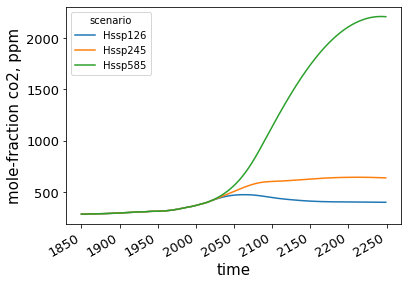

In [262]:
import matplotlib
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 
ds.pco2atm.plot.line(x='time')
plt.xlabel('time',fontsize=15)
plt.ylabel('mole-fraction co2, ppm',fontsize=15)